# Task 02: Linear Regression with One Variable 

## Import libraries

In [3]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: 
Read the data files using pandas.


   Area(sq_ft)   Price
0         8450  208500
1         9600  181500
2        11250  223500
3         9550  140000
4        14260  250000
shape of data before removing outliers: (1460, 2)
shape of data after removing outliers: (1426, 2)


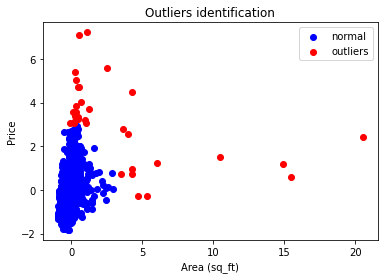

shape of train data: (999, 2)
shape of validation data: (214, 2)
shape test data: (213, 2)


In [4]:
# read data into data frame 
df = pd.read_csv('task01.csv')

# drop the serial coloumn 
df = df.drop(['Unnamed: 0'], axis =1)
print(df.head())

# normalize the data 
df=(df-df.mean())/df.std()

# remove outliers
print('shape of data before removing outliers:',df.shape)
data = df[(df.abs()<3).all(axis=1)].copy()
outlier = df[(df.abs()>=3).any(axis=1)].copy()
print('shape of data after removing outliers:',data.shape)

#plot data and outliers
plt.scatter(data['Area(sq_ft)'],data['Price'] , c = 'blue')
plt.scatter(outlier['Area(sq_ft)'],outlier['Price'], c ='red')
plt.xlabel('Area (sq_ft)')
plt.ylabel('Price')
plt.title('Outliers identification')
plt.legend(["normal" , "outliers"])
plt.show()

# Split data into train, val and test
def train_val_test_split(data,train_per, val_per):
    samples = len(data)
    train_samples = math.ceil(samples*train_per)
    val_samples = math.ceil(samples*val_per)
    indices = np.random.permutation(data.shape[0])
    train_idx, val_idx, test_idx = indices[:train_samples], indices[train_samples:train_samples+val_samples] , indices[train_samples+val_samples:]
    train, val, test = data.iloc[train_idx], data.iloc[val_idx], data.iloc[test_idx]
    return train, val, test

train, val ,test = train_val_test_split(data,0.7,0.15)
print('shape of train data:', train.shape)
print('shape of validation data:', val.shape)
print('shape test data:', test.shape)

# seperte features and labels
train_x , train_y = train.iloc[:,:-1].to_numpy().reshape(-1),train.iloc[:,-1]
val_x , val_y = val.iloc[:,:-1].to_numpy().reshape(-1),val.iloc[:,-1]
test_x , test_y = test.iloc[:,:-1].to_numpy().reshape(-1),test.iloc[:,-1]

## Step 2: 
Randomly initialize the m and c. Set the learning rate to 0.001 and set the number of epochs to 100

In [5]:
m = np.random.rand()
c = np.random.rand()
learning_rate = 0.001
epochs = 100

## Step 3:
Write a function loss_func(y_ture, y_pred) that takes predicted apartment price and
original apartment price as input and returns the mean squared error b/w the true and predicted
price

In [6]:
def loss_function(m, c, x = train_x, y = train_y ):
    loss = np.dot(y-(m*x +c), y-(m*x +c)) / len(y)
    return loss 

## Step 4:
Write a function grad_descent(learning_rate, epochs, m, c) that performs the gradient
descent to reach optimal values of m and c for the given dataset. The algorithm is explained in
the overview section. The function should return final values of m, c and an array containing the
loss values at each epoch.


In [7]:
def dldm(m,c):
    dldm = -2*(np.dot((y-((m*x)+c)),x))/len(y)
    return dldm
def dldc(m,c):
    dldc = -2*np.sum((y-((m*x)+c)))/len(y)
    return dldc
def gradf(m,c):
    dm = dldm(m,c)
    dc = dldc(m,c)
    return np.array([dm, dc]) 

In [8]:
x = train_x
y = train_y

def grad_descent(learning_rate, epoch, m, c):
    EPS = 1e-5   #EPS = 10**(-5)
    init_t= np.array([m,c])
    prev_t = init_t-10*EPS
    t = init_t.copy()
    max_iter = epoch
    iter  = 0
    loss_history_train = []
    loss_history_val = []
    loss_history_test = []
    while np.linalg.norm(t - prev_t) >  EPS and iter < max_iter:
        prev_t = t.copy()
        grad = gradf(t[0],t[1]) 
        t -= learning_rate*grad
        loss_history_train.append(loss_function(t[0],t[1]))
        loss_history_val.append(loss_function(t[0],t[1],val_x,val_y))
        loss_history_test.append(loss_function(t[0],t[1],test_x,test_y))
        iter += 1
    return t[0],t[1], loss_history_train,loss_history_val,loss_history_test
    

In [9]:
m ,c, lh_train, lh_val, lh_test = grad_descent(learning_rate, epochs, m, c)

## Step 5
Plot the epoch vs training and validation loss using matplotlib and report test lose.

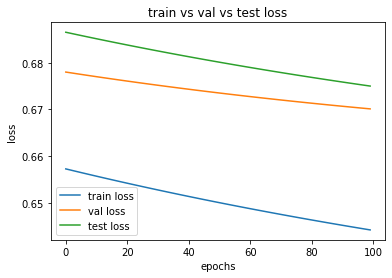

In [10]:
x_axis = [i for i in range(epochs)]
plt.plot(x_axis,lh_train)
plt.plot(x_axis,lh_val)
plt.plot(x_axis,lh_test)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('train vs val vs test loss')
plt.legend(['train loss',"val loss" , "test loss"])
plt.show()

In [11]:
print('best parameters:',m ,c )
print('train loss at these parameters:', lh_train[-1])
print('val loss at these parameters:' ,lh_val[-1])
print('test loss at these parameters:', lh_test[-1])

best parameters: 0.8024303555851369 0.13894580918323693
train loss at these parameters: 0.6442186709459236
val loss at these parameters: 0.6701309238646099
test loss at these parameters: 0.6750152448023103


In [12]:
print('test loss is:',lh_test[-1])

test loss is: 0.6750152448023103


## Step 6
Plot the training data with linear regression fit and find test loss.

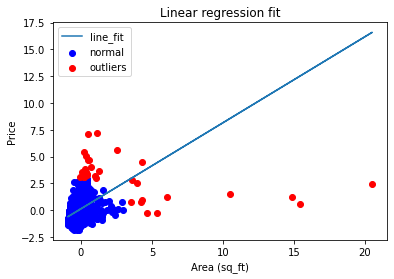

In [15]:
plt.scatter(data['Area(sq_ft)'],data['Price'] , c = 'blue')
plt.scatter(outlier['Area(sq_ft)'],outlier['Price'], c ='red')
plt.plot(df['Area(sq_ft)'],df['Area(sq_ft)']*m+c)
plt.xlabel('Area (sq_ft)')
plt.ylabel('Price')
plt.title('Linear regression fit')
plt.legend(['line_fit',"normal" , "outliers"])
plt.show()